In [78]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evgeniy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

dataset source https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [10]:
train_tweets = pd.read_csv('~/archive-3/train.csv', usecols=['label', 'tweet'])
test_tweets = pd.read_csv('~/archive-3/test.csv')

In [13]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [14]:
test_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [16]:
stop_words = set(stopwords.words('english'))

In [18]:
train_tweets.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [43]:
train_tweets['cleared_tweets'] = train_tweets['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

In [54]:
train_tweets['cleared_tweets'] = train_tweets['cleared_tweets'].apply(lambda x: ' '.join(x.split()))

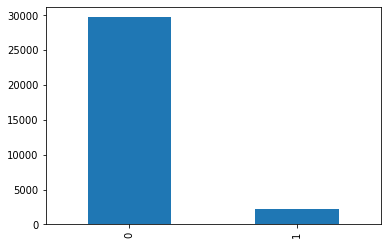

In [56]:
train_tweets['label'].value_counts().plot(kind='bar');

In [58]:
tfidf_vect = TfidfVectorizer(stop_words=stop_words, max_features=10000, ngram_range=(3, 3))

In [60]:
sparsed = tfidf_vect.fit_transform(train_tweets['cleared_tweets'])

In [65]:
tfidf = sparsed.toarray()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(sparsed, 
                                                    train_tweets['label'], 
                                                    test_size=.25, 
                                                    random_state=42)

In [86]:
model = BernoulliNB()
model.fit(X_train, y_train)
preds_proba = model.predict_proba(X_test)
preds = model.predict(X_test)
print('ROC AUC: ', roc_auc_score(y_test, preds_proba[: , 1]))
pd.DataFrame(confusion_matrix(y_test, preds))

ROC AUC:  0.671023481112474


,0,1
0,7082,350
1,382,177


In [88]:
model = MultinomialNB()
model.fit(X_train, y_train)
preds_proba = model.predict_proba(X_test)
preds = model.predict(X_test)
print('ROC AUC: ', roc_auc_score(y_test, preds_proba[: , 1]))
pd.DataFrame(confusion_matrix(y_test, preds))

ROC AUC:  0.7154532640363866


,0,1
0,7432,0
1,458,101


In [90]:
model = GaussianNB()
model.fit(X_train.toarray(), y_train)
preds_proba = model.predict_proba(X_test.toarray())
preds = model.predict(X_test.toarray())
print('ROC AUC: ', roc_auc_score(y_test, preds_proba[: , 1]))
pd.DataFrame(confusion_matrix(y_test, preds))

ROC AUC:  0.6193309500472741


,0,1
0,2146,5286
1,28,531
